In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')

In [6]:
path = '../dsc/Data/airline_tickets/'
f = sc.textFile(os.path.join(path,"sales_segments.csv.gz"))

In [7]:
f.take(3)

['rloc^departure_date_seg^booking_date^freq_flyer_flag^creator_office_id^creator_iata_number^creator_gds_code^creator_city_code^creator_lat^creator_lon^creator_country_code^creator_continent_code^creator_channel_code^booking_status_code^cabin_code^booking_class_code^pos_office_id^pos_iata_number^pos_gds_code^pos_city_code^pos_lat^pos_lon^pos_country_code^pos_continent_code^pos_channel_code^board_point_seg^board_lat^board_lon^board_country_code^board_continent_code^off_point_seg^off_lat^off_lon^off_country_code^off_continent_code^num_legs^distance_seg^route^network^airline_code^flight_number^flight_type^revenue_source^estimated_flag^usage_board_point_seg^usage_off_point_seg^usage_flight_number^usage_date^non_currency_type^bookings_seg^rpk_seg^revenue_amount_seg^currency_code^fuel_surcharge_amount_seg^fuel_surcharge_currency_code^emd_count^emd_amount^emd_currency_code^total_outliers',
 '59GS9Y^2013-12-21^2013-09-05^false^RUNHS3103^66200201^1A^RUN^-20.90083^55.53715^RE^Africa^Travel Agent

In [10]:
header = f.first()

In [11]:
cols = header.split('^')

In [12]:
cols

['rloc',
 'departure_date_seg',
 'booking_date',
 'freq_flyer_flag',
 'creator_office_id',
 'creator_iata_number',
 'creator_gds_code',
 'creator_city_code',
 'creator_lat',
 'creator_lon',
 'creator_country_code',
 'creator_continent_code',
 'creator_channel_code',
 'booking_status_code',
 'cabin_code',
 'booking_class_code',
 'pos_office_id',
 'pos_iata_number',
 'pos_gds_code',
 'pos_city_code',
 'pos_lat',
 'pos_lon',
 'pos_country_code',
 'pos_continent_code',
 'pos_channel_code',
 'board_point_seg',
 'board_lat',
 'board_lon',
 'board_country_code',
 'board_continent_code',
 'off_point_seg',
 'off_lat',
 'off_lon',
 'off_country_code',
 'off_continent_code',
 'num_legs',
 'distance_seg',
 'route',
 'network',
 'airline_code',
 'flight_number',
 'flight_type',
 'revenue_source',
 'estimated_flag',
 'usage_board_point_seg',
 'usage_off_point_seg',
 'usage_flight_number',
 'usage_date',
 'non_currency_type',
 'bookings_seg',
 'rpk_seg',
 'revenue_amount_seg',
 'currency_code',
 'fue

In [14]:
pax_col = cols.index('bookings_seg')
rev_col = cols.index('revenue_amount_seg')
tax_col = cols.index('fuel_surcharge_amount_seg')

In [15]:
data = f.filter(lambda r: r!=header)

In [ ]:
#Si estuvieramos en un cluster hbr = sc.broadcast(header)

In [ ]:
#data = f.filter(lambda hbr: hbr!=header)

In [16]:
data.first()

'59GS9Y^2013-12-21^2013-09-05^false^RUNHS3103^66200201^1A^RUN^-20.90083^55.53715^RE^Africa^Travel Agent^HK^Y^N^RUNHS3103^66200201^1A^RUN^-20.90083^55.53715^RE^Africa^Travel Agent^ZYR^50.8348^4.33653^BE^Europe^CDG^49.01278^2.55^FR^Europe^0^239.573363253866^CDG-ZYR^Europe^UU^5901^I^LIFT^false^ZYR^CDG^5901^2013-12-21^^1^239^33.56^EUR^7.30^EUR^0^0.00^^7.3'

In [20]:
#definimos la funcion
def rev_tax(row):
    el = row.split('^')
    rloc = el[0]
    pax = float(el[pax_col])
    revenue = float(el[rev_col])/pax
    tax = float(el[tax_col])/pax
    return (revenue, tax)

In [21]:
points = data.map(rev_tax)

In [22]:
points.take(10)

[(33.56, 7.3),
 (61.2, 25.5),
 (71.86842105263158, 12.31578947368421),
 (27.116666666666664, 13.31),
 (0.0, 15.91),
 (24.802, 12.48),
 (18.4275, 11.98),
 (65.5, 13.0),
 (0.0, 15.76),
 (99.5, 13.0)]

In [23]:
#Ploteamos algo aunque como esta en distribuido no podemos

In [37]:
smaller = points.takeSample(num=10000, withReplacement=False)

In [34]:
smaller

[(726.99, 202.2),
 (61.73, 19.59),
 (381.0, 35.83),
 (381.0, 169.39),
 (99.0, 36.14),
 (488.0, 173.56),
 (218.49, 169.39),
 (188.25, 36.14),
 (178.77333333333334, 183.69000000000003),
 (427.99, 183.57),
 (99.0, 27.16),
 (196.88, 14.45),
 (117.5, 43.64),
 (80.37, 20.54),
 (63.99, 17.69),
 (310.99, 187.55),
 (63.99, 17.96),
 (103.0, 38.5),
 (888.0, 203.61),
 (268.14, 230.19),
 (8.836666666666668, 4.72),
 (543.445, 224.45),
 (537.27, 280.56),
 (734.97, 183.32),
 (56.95666666666667, 14.69),
 (235.33333333333334, 179.38333333333333),
 (262.0, 195.67),
 (118.0, 53.18),
 (43.89, 8.33),
 (451.0, 204.1),
 (431.49, 195.82),
 (157.42, 38.97),
 (75.5, 35.36),
 (28.99, 14.19),
 (41.01, 30.65),
 (310.99, 172.85),
 (74.11, 0.0),
 (259.99, 36.15),
 (75.5, 52.85),
 (85.25666666666667, 45.29333333333333),
 (260.5, 87.55),
 (59.99, 34.42),
 (64.0, 14.63),
 (43.59, 23.53),
 (198.155, 174.575),
 (184.01, 185.49),
 (42.44, 239.58),
 (146.0, 201.32),
 (63.99, 20.89),
 (398.5, 216.17),
 (209.11, 184.46),
 (39

In [29]:
import numpy as np

In [38]:
smaller = np.array([[x[0],x[1]] for x in smaller])


In [39]:
smaller

array([[  88.5 ,   61.09],
       [  56.11,   17.62],
       [ 772.56,  162.82],
       ..., 
       [ 254.94,   29.37],
       [  28.81,    2.39],
       [  28.67,    5.78]])

(-100, 3000)

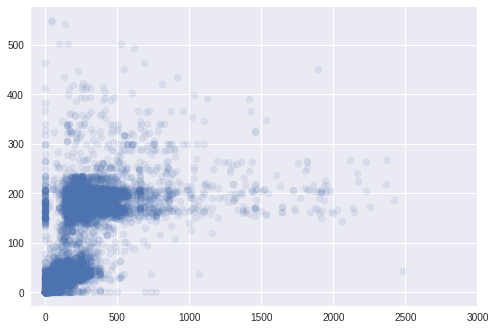

In [40]:
plt.scatter(x=smaller[:,0],y=smaller[:,1], alpha=0.1)
plt.xlim([-100,3000])


In [48]:
from pyspark.mllib.clustering import KMeans
from pyspark.mllib.clustering import KMeansModel

In [42]:
clusters_smaller = KMeans.train(sc.parallelize(smaller),3)

In [43]:
clusters = KMeans.train(points,3)

In [44]:
clusters

In [49]:
#para guardar el modelo
clusters.save(sc, './mymodel')

Py4JJavaError: An error occurred while calling o285.save.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/home/dsc/mymodel/metadata already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply$mcV$sp(PairRDDFunctions.scala:1119)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1096)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopDataset$1.apply(PairRDDFunctions.scala:1096)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1096)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply$mcV$sp(PairRDDFunctions.scala:1070)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1035)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$4.apply(PairRDDFunctions.scala:1035)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1035)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply$mcV$sp(PairRDDFunctions.scala:961)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:961)
	at org.apache.spark.rdd.PairRDDFunctions$$anonfun$saveAsHadoopFile$1.apply(PairRDDFunctions.scala:961)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:960)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply$mcV$sp(RDD.scala:1489)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1468)
	at org.apache.spark.rdd.RDD$$anonfun$saveAsTextFile$1.apply(RDD.scala:1468)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1468)
	at org.apache.spark.mllib.clustering.KMeansModel$SaveLoadV1_0$.save(KMeansModel.scala:128)
	at org.apache.spark.mllib.clustering.KMeansModel.save(KMeansModel.scala:94)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [46]:
KMeansModel.load(sc, './mymodel')

NameError: name 'KMeansModel' is not defined

In [47]:
clusters.k

3

In [50]:
#calculamos las distancias de cada centroide a los puntos

In [53]:
clusters.computeCost??
#vemos que esta funcion ya lo hace

In [54]:
clusters.computeCost(points)

1764005058814.4927

In [57]:
model = []
errors = []

for n in range(3,9,2):
    clusters = KMeans.train(points,n)
    model.append(clusters)
    e = clusters.computeCost(points)
    errors.append(e)
    print(n)
    

n
n
n


In [58]:
errors

[2076359443335.84, 557705661882.7856, 271660292047.691]

In [59]:
min(errors)

271660292047.691